In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scale import auto_scale, calculate_scaling_index

In [2]:
np.random.seed(123)

# Dvi visiškai atskirtos bendruomenės

Visuose teritoriniuose lygmenyse grupės išlieka atskiros.

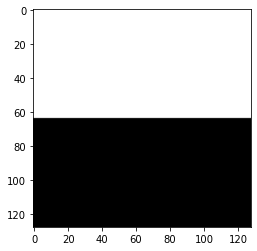

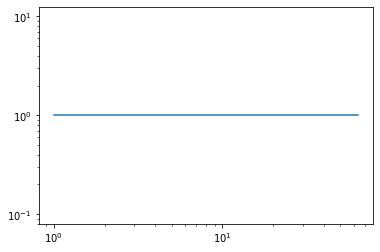

scaling_index=1.0000


In [3]:
data = np.ones((128, 128))
data[64:, :] = np.zeros((64, 128))

plt.figure()
plt.imshow(data, cmap="gray")

scales, stds = auto_scale(data, analysis_fn=np.std)
plt.figure()
plt.loglog()
plt.plot(scales, stds)
plt.show()

print(f"scaling_index={calculate_scaling_index(scales, stds):.4f}")

Šiuo atveju norėtume indekso $I$ vertę gauti lygią $1$ (kaip ir gavo skaitmeninė funkcija).

Toliau bandau paaiškinti tos skaitmeninės funkcijos logiką. Šis atvejis, kurį nagrinėjame, yra ekstremalus atvejis - didesnį plotą galima gauti nebent su netvarkingais duomenimis (jei tas išviso įmanoma). Suskaičiuokime plotą po šia "ekstremalia" standartinio nuokrypio kreive:

$$ A_{max} = \int_1^{s_{max}} \sigma(s) ds = \int_1^{s_{max}} 1 ds = s_{max} - 1 . $$

Taigi turint mintyje tik maksimalaus ploto apribojimą indekso formulė galėtų atrodyti:

$$ I = \frac{1}{A_{max}} \int_1^{s_{max}} \sigma(s) ds . $$

Skaitmeninio modelio atveju integravimą atlikime trapecijų metodu. Šiaip didesnio skirtumo kokį integravimo metodą pasirinksime veikiausiai nėra, tad pasirinkimas yra sąlyginis.

# Atsitiktinai susimaišiusi bendruomenė

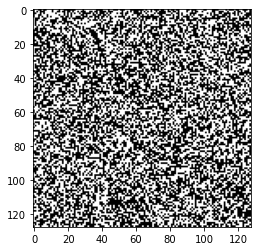

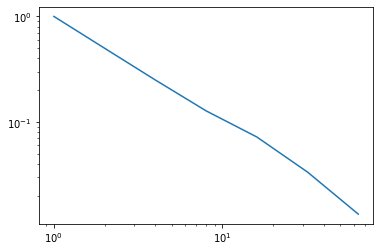

scaling_index=0.0026


In [4]:
data = (np.random.rand(128, 128) < 0.5).astype(int)

plt.figure()
plt.imshow(data, cmap="gray")

scales, stds = auto_scale(data, analysis_fn=np.std)
plt.figure()
plt.loglog()
plt.plot(scales, stds)
plt.show()

print(f"scaling_index={calculate_scaling_index(scales, stds):.4f}")

Šiuo atveju norėtume indekso vertę gauti apie nulį. Bet akivaizdu, kad, jei naudosime formulę tokią kokia ji yra dabar, to negausime.

Mąstant begalinio modelio atveju:

$$ A_{base} = \int_1^{s_{max}} \sigma(s) d s = \int_1^{s_{max}} \frac{1}{s} d s = \log(s_{max}) . $$

Begalinio modelio atveju gero rezultatu nesigauna - integralo vertė diverguoja. Bet realiu atveju $ s_{max} $ visada bus baigtinis. Realiu atveju, tiesa, turėtume naudoti tą patį metodą integralui suskaičiuoti, tad analiziniu rezultatu nesinaudojame, o integravimą atliksime trapecijų metodu. Nes realiu atveju savo įtakos turės ir mastelių diskretumas.

Taigi, jei norime atsitiktiniam modeliui gauti nulį, indeksą turėtume skaičiuoti taip:

$$ I = \int_1^{s_{max}} \sigma(s) ds - A_{base} . $$

Žinoma, tada išsimuša mūsų skaičiavimas ankstesniu ekstremaliu atveju. Atsižvelgti į jį galėtume užrašę tokią išraišką:

$$ I = \frac{\int_1^{s_{max}} \sigma(s) ds - A_{base}}{A_{max} - A_{base}} . $$

# "Idealiai" išsimaišiusios bendruomenės

Žemiausiame lygyje skirtumai yra, bet aukštesniuose jie išnyksta.

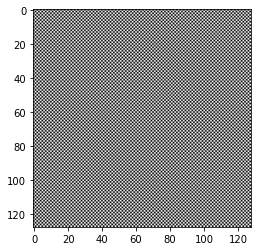

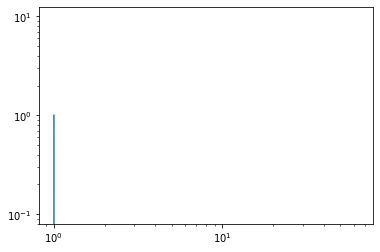

scaling_index=-1.0000


In [5]:
data = np.ones((128, 128))
data[::2, ::2] = 0
data[1::2, 1::2] = 0

plt.figure()
plt.imshow(data, cmap="gray")

scales, stds = auto_scale(data, analysis_fn=np.std)
plt.figure()
plt.loglog()
plt.plot(scales, stds)
plt.show()

print(f"scaling_index={calculate_scaling_index(scales, stds):.4f}")

Šiuo atveju norime gauti $I=-1$. Ir tą padaryti analiziškai sunku, nes ekstremalūs plotai nėra simetriški atsitiktiniu atveju atžvilgiu. T.y.:

$$ A_{base} - A_{min} \neq A_{max} - A_{base} . $$

Minimalus plotas skaičiuojamas:

$$ A_{min} = \int_1^{s_{max}} \sigma(s) d s = \int_1^{s_{max}} \delta(1-s) d s \gtrsim 0 . $$

Realiu atveju minimalus plotas bus mažas, bet teigiamas skaičius. Dėl diskretumo efektų ir naudojamo trapecijų metodo.

Taigi jei norime gauti teisingą indekso vertę šiuo ekstremaliu atveju, turime:

$$ I = \frac{\int_1^{s_{max}} \sigma(s) d s - A_{base}}{A_{base} - A_{min}} = \frac{\int_1^{s_{max}} \sigma(s) d s - A_{min}}{A_{base} - A_{min}} - 1 . $$

Iš paskutinio užrašymo turbūt akivaizdu, kad atsitiktiniu atveju tvarkingai gautume ir nulinį indeksą iš šios formulės. Bėda tame, kad suderinti abi išraiškas yra veikiausiai neįmanoma.

# Universali formulė

Taigi, jei norime universalios indekso formulės, turime užrašyti:

$$ A_{data} = \int_1^{s_{max}} \sigma(s) d s , $$

$$ I = \begin{cases}
\frac{A_{data} - A_{base}}{A_{max} - A_{base}} & \text{if}\: A_{data} > A_{base} , \\
\frac{A_{data} - A_{base}}{A_{base} - A_{min}} & \text{otherwise} .
\end{cases} $$

Griozdas, bet kažin ar galima geriau.

In [6]:
def graphstate(a, b, f, state, n):
    '''
    Problem with axis - Y axis upside down
    
    a,b - plot numbers; f - plot obbect; state - 2D matrix of Ising; n = current number of plot
    '''
    sp =  f.add_subplot(a, b, n)
    
    plt.setp(sp, xticks=[], yticks=[])
    #plt.setp(sp.get_yticklabels(), visible=False)
    #plt.setp(sp.get_xticklabels(), visible=False)
    #plt.set_aspect('equal')
    
    plt.imshow(state, cmap='gray_r')

    #plt.savefag("test.png", bbox_inches='tight')

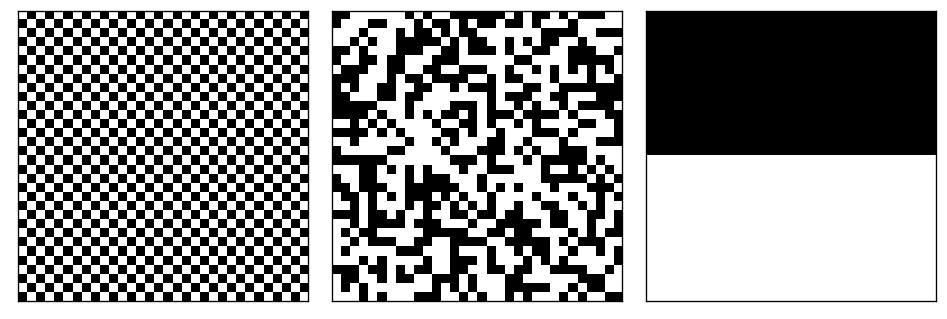

In [7]:
f = plt.figure(figsize=(8,8), dpi=120)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
data = np.ones((32, 32))
data[::2, ::2] = 0
data[1::2, 1::2] = 0

graphstate(1,3,f,data,1)


data = (np.random.rand(32, 32) < 0.5).astype(int)

graphstate(1,3,f,data,2)


data = np.ones((32, 32))
data[16:, :] = np.zeros((16, 32))

graphstate(1,3,f,data,3)
plt.tight_layout()
plt.savefig('index-snaps.png')
plt.savefig('index-snaps.pdf')

TypeError: 'AxesSubplot' object is not subscriptable

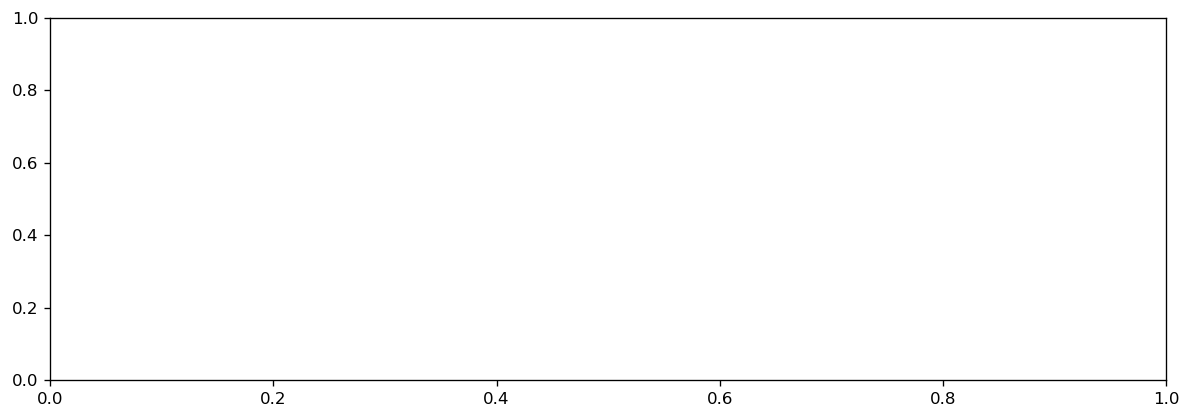

In [8]:
fig, axs = plt.subplots(1,1,figsize=(12,4), dpi=120)
#plt.setp(sp.get_yticklabels(), visible=False)
#-1
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

data = np.ones((128, 128))
data[::2, ::2] = 0
data[1::2, 1::2] = 0
scales, stds = auto_scale(data, analysis_fn=np.std)
axs[0].set_ylabel('')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title(r'$I=-1$')
axs[0].plot(scales, stds, 'k-')
axs[0].grid()
axs[0].set_ylabel(r'$\sigma (s)/\sigma_0(s)$')
#axs[0].set_aspect('equal', 'box')

#axs[0,0].axis('off')
#axs[0,0].imshow(data, cmap='gray_r')
#axs[0, 0].set_aspect('equal', 'box')

#rand
data = (np.random.rand(128, 128) < 0.5).astype(int)
scales, stds = auto_scale(data, analysis_fn=np.std)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title(r'$I=-1$')
axs[1].plot(scales, stds, 'k-')
axs[1].grid()
axs[1].set_xlabel('s')
#axs[1].set_aspect('equal', 'box')

#axs[0,1].axis('off')
#axs[0,1].imshow(data, cmap='gray_r')
#axs[0,1].set_aspect('equal', 'box')

#+1
data = np.ones((128, 128))
data[64:, :] = np.zeros((64, 128))
scales, stds = auto_scale(data, analysis_fn=np.std)
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_title(r'$I=-1$')
axs[2].plot(scales, stds, 'k-')
axs[2].grid()
#axs[2].set_aspect('equal', 'box')

#axs[0,2].axis('off')
#axs[0,2].imshow(data, cmap='gray_r')
#axs[0,2].set_aspect('equal', 'box')
fig.savefig('sigma.png')
fig.savefig('sigma.pdf')

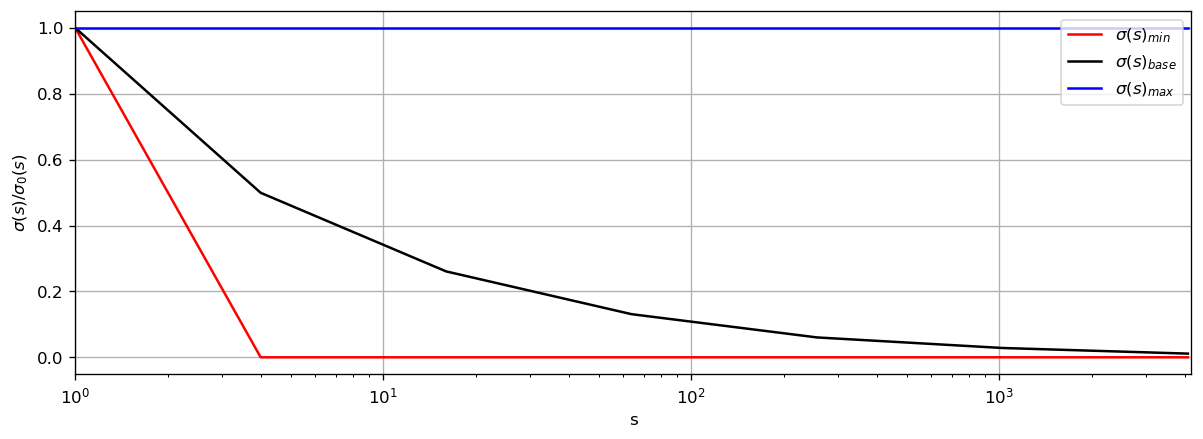

In [13]:
fig, axs = plt.subplots(1,1,figsize=(12,4), dpi=120)
#plt.setp(sp.get_yticklabels(), visible=False)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300



axs.set_ylabel(r'$\sigma (s)/\sigma_0(s)$')
axs.set_xlabel('s')
axs.set_xscale('log')
#axs.set_yscale('log')
axs.set_xlim([1, 4200])

axs.grid()


#-1
data = np.ones((128, 128))
data[::2, ::2] = 0
data[1::2, 1::2] = 0
scales, stds = auto_scale(data, analysis_fn=np.std)
axs.plot(scales*scales, stds, 'r-', label=r'$\sigma(s)_{min}$')


#rand
data = (np.random.rand(128, 128) < 0.5).astype(int)
scales, stds = auto_scale(data, analysis_fn=np.std)

axs.plot(scales*scales, stds, 'k-', label=r'$\sigma(s)_{base}$')


#+1
data = np.ones((128, 128))
data[64:, :] = np.zeros((64, 128))
scales, stds = auto_scale(data, analysis_fn=np.std)

axs.plot(scales*scales, stds, 'b-', label=r'$\sigma(s)_{max}$')

axs.legend(loc='upper right')

fig.savefig('sigma-present.png')
fig.savefig('sigma-present.pdf')

In [ ]:
data = (np.random.rand(128, 128) < 0.5).astype(int)
scales, stds = auto_scale(data, analysis_fn=np.std)

In [ ]:
scales

In [ ]:
data.shape[0]*data.shape[1]

In [ ]:
128*128

In [ ]:
data[-2]